Number of entries: 5268
unindentified causes: 3319
HOW MANY ENTRIES NOT HOW MANY PEOPLE: 
engine failure 420
poor weather 416
stall 271
pilot error 152
shot down 133
turbulence 117
on fire 116
fuel exhaustion 71
electrical problem 41
structure failure 39
terrorism 12
Number of accidents 5238
Number of fatalities 105323.0
Number of aboard 144382.0


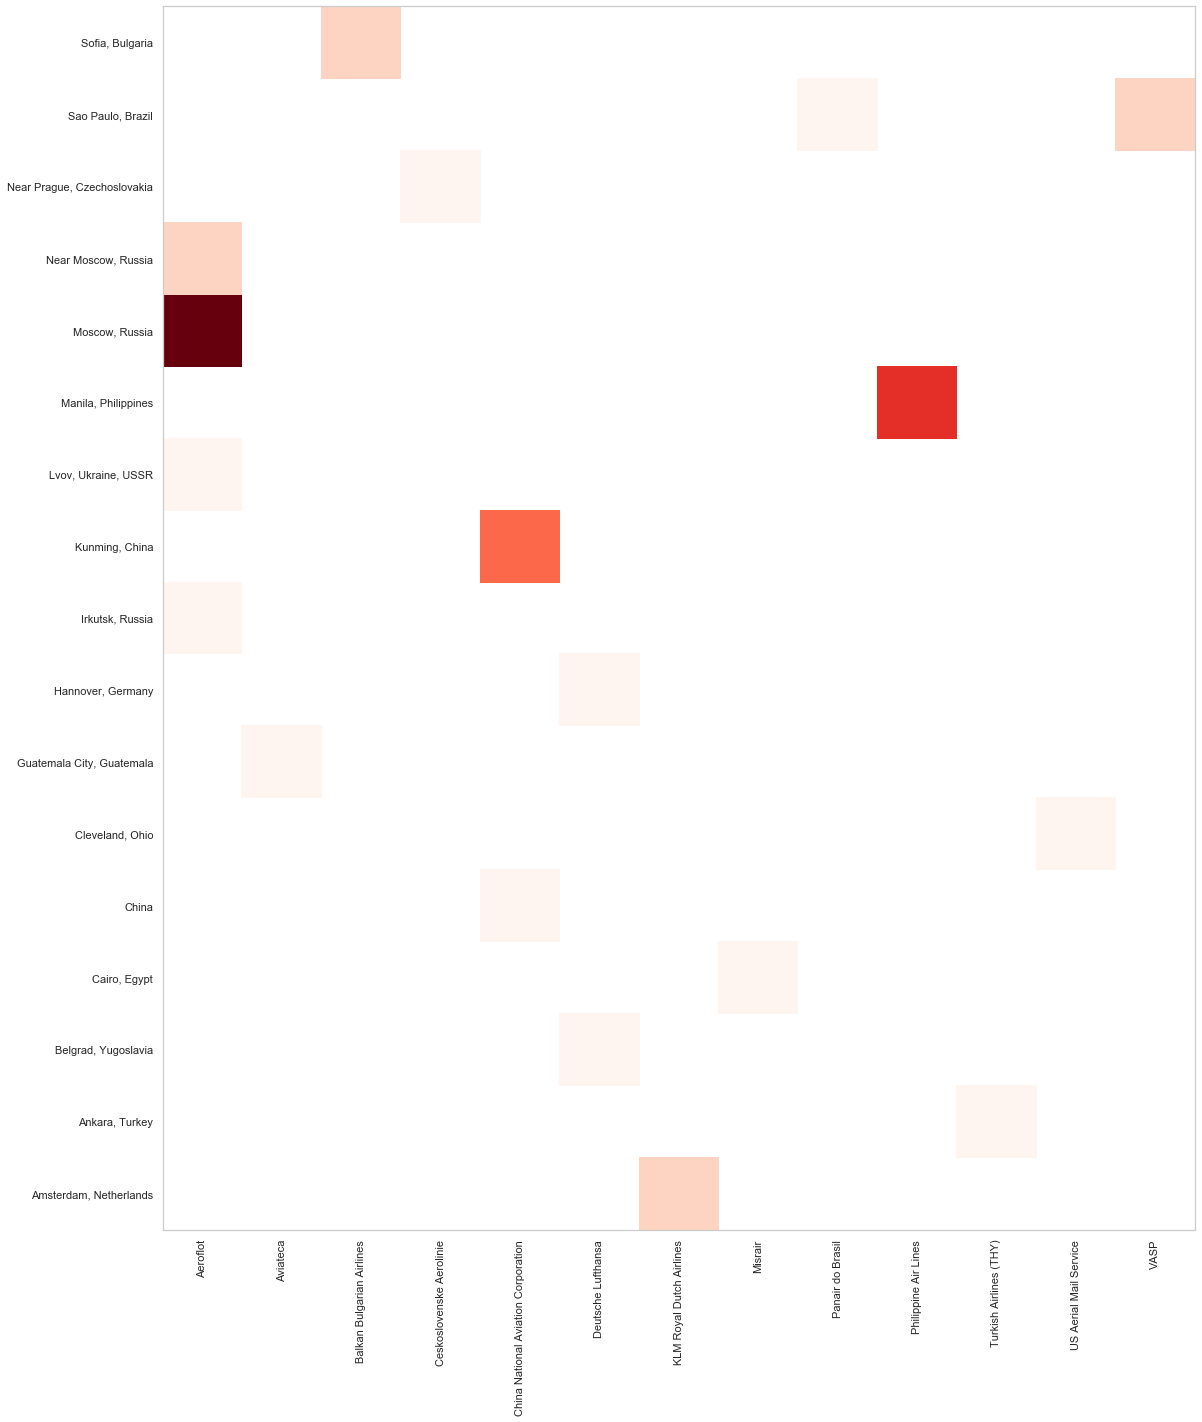

NameError: name 'seasons' is not defined

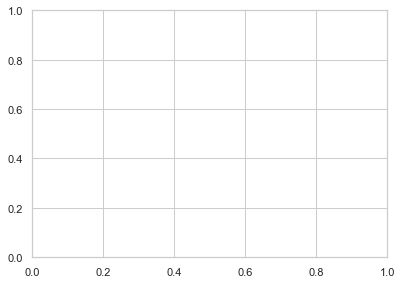

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from csv import writer
from csv import reader
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import operator
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from gensim import corpora, models

from collections import Counter

data = pd.read_csv('Clean_data.csv')

failures = {
    'pilot error': '(pilot|crew) (error|fatigue)',
    'engine failure': 'engine.*(fire|fail)',
    'structure failure': '(structural fail)|(fuel leak)|(langing gear)',
    'electrical problem': 'electrical',
    'poor weather': '((poor|bad).*(weather|visibility)|thunderstorm)',
    'stall': 'stall',
    'on fire': '(caught fire)|(caught on fire)',
    'turbulence': 'turbulence',
    'fuel exhaustion': '(out of fuel)|(fuel.*exhaust)',
    'terrorism': 'terrorist|terrorism',
    'shot down': 'shot down',
}

##PLOT TYPE OF CRASHES WITH HOW MANY PEOPLE FOR EACH TYPE## HOWWWWW TO DO THAT

failure_counts = {'other':0}

fatality_count = {'some':0}

for s in data.Summary.dropna():
    other = True
    for failure, exp in failures.items():
        if re.search(exp, s.lower()):
            other = False
            if failure in failure_counts:
                failure_counts[failure] += 1
            else:
                failure_counts[failure] = 1
    if other:
        failure_counts['other'] += 1

nan_counts = len(data.Summary.isnull())
print('Number of entries: %d' % nan_counts)
print('unindentified causes: %d' % failure_counts['other'])

del failure_counts['other']

sortedcauses = sorted(failure_counts.items(), key=operator.itemgetter(1), reverse=True)

print('HOW MANY ENTRIES NOT HOW MANY PEOPLE: ')
for k, v in sortedcauses:
    print(k, v)


operator = data[['Operator','Fatalities', 'Aboard']].groupby('Operator').agg(['sum','count'])
accidents = operator['Fatalities','count'].sort_values(ascending=False)
totalacc = accidents.sum()
accprop = accidents/totalacc
print ('Number of accidents',totalacc)

fatalities = operator['Fatalities','sum'].sort_values(ascending=False)
totalfatal = fatalities.sum()
print ('Number of fatalities',totalfatal)
fatalprop = fatalities/totalfatal

aboard = operator['Aboard','sum'].sort_values(ascending=False)
totalA = aboard.sum()
print('Number of aboard', totalA)



##location and airline crash sites


df = pd.DataFrame(data[['Location','Operator']])
df = pd.DataFrame(data={'Location':df.groupby(['Location','Operator']).size().index.get_level_values('Location'),'Operator':df.groupby(['Location','Operator']).size().index.get_level_values('Operator'),'Count':df.groupby(['Location','Operator']).size()})
df = df.reset_index(drop=True)
df =df.sort_values('Count', ascending=False)
df = df[df['Count']>2].pivot(index='Location', columns='Operator', values='Count') #count used 5
df = df.replace(to_replace='NaN', value=0)
plt.pcolor(df, cmap='Reds')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns,rotation='vertical')

fig=plt.gcf()
fig.set_size_inches(18.5,22.5)

plt.savefig('sample.pdf')
fig.savefig('sample.png')
plt.show()
#savefig('sample.png')



######################################

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

fig = plt.figure(figsize=(14, 10))


sub3 = fig.add_subplot(224)
sns.barplot(x=seasons, y=crashes_season, color='grey', ax=sub3)
texts = sub3.set(ylabel="Crashes", xlabel="Season", title="Plane crashes per season")

##PLOTS!


#How many people died of Engine F, ETC

#PLOT ACCIDENT 
accidents.head(10).plot(kind='bar',title='Accidents by Operator',ax=ax1,grid=True,rot=90)

accprop.head(10).plot(kind='bar',title='Proportion of Total Accidents',ax=ax2,grid=True,rot=90)
#FATALITIES
fatalities.head(10).plot(kind='bar',title='Fatalities by Operator',ax=ax3,grid=True,rot=90)

fatalprop.head(10).plot(kind='bar',title='Proportion of total Fatalities',ax=ax4,grid=True,rot=90)

#Plots
props = operator['Fatalities'].reset_index()
props['Fatalities per Crash'] = props['sum']/props['count']
props.columns = ['Operator','Fatalities','Accidents','Fatalities per Accident']

########

acctype.head(10).plot(kind='bar',title='Accidents by Type',grid=True,ax=ax1,rot=90)

typeprop.head(10).plot(kind='bar',title='Proportion of total accidents',grid=True,ax=ax2,rot=90)

fataltype.head(10).plot(kind='bar',title='Fatalities by Type',grid=True,ax=ax3,rot=90)

typefatalprop.head(10).plot(kind='bar',title='Proportion of total fatalities',grid=True,ax=ax4,rot=90)

#Linear regression for predicting deaths 
operator.dropna(inplace=True)
X = operator['Fatalities','count']
Y = operator['Fatalities','sum']
model = LinearRegression()
model.fit(X.values.reshape(-1,1),Y.values.reshape(-1,1))
m = model.coef_[0][0]
c = model.intercept_[0]

fig_fit,axd=plt.subplots()
axd.scatter(X,Y,label='Operators')
axd.set_title('Linear Model: Predicting Fatalities given Accidents')
axd.plot(X,model.predict(X.values.reshape(-1,1)),label='Linear Fit: y = %2.2fx %2.2f' % (m,c))
axd.grid(True)
axd.set_xlabel('Accidents')
axd.set_ylabel('Fatalities')
axd.legend(loc=2)




#prints every failures in the column with the cause of accident and the total count of accidents
#for sin in data.Fatalities.dropna():
 # for j in sortedcauses:
   # if failure in fatality_count[]
  # print(sin,j)
  # print data.Fatalities.sum()
  

#Plot STUFF
#plt.figure(figsize=(14, 8))
#x, y = zip(*sortedcauses)
#sns.barplot(x=x, y=y)
#plt.xticks(rotation=25, horizontalalignment='right')
#plt.show(block=True)
#matplotlib.plt.show()
